# MY First Kaggle Notebook - for submission
## House prices - Regression

### 1. Loading the data 


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
train = pd.read_csv("E:/Notebook/House_prices/train.csv")
test = pd.read_csv("E:/Notebook/House_prices/test.csv")

In [55]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [56]:
train_copy =train.copy()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Data Cleaning

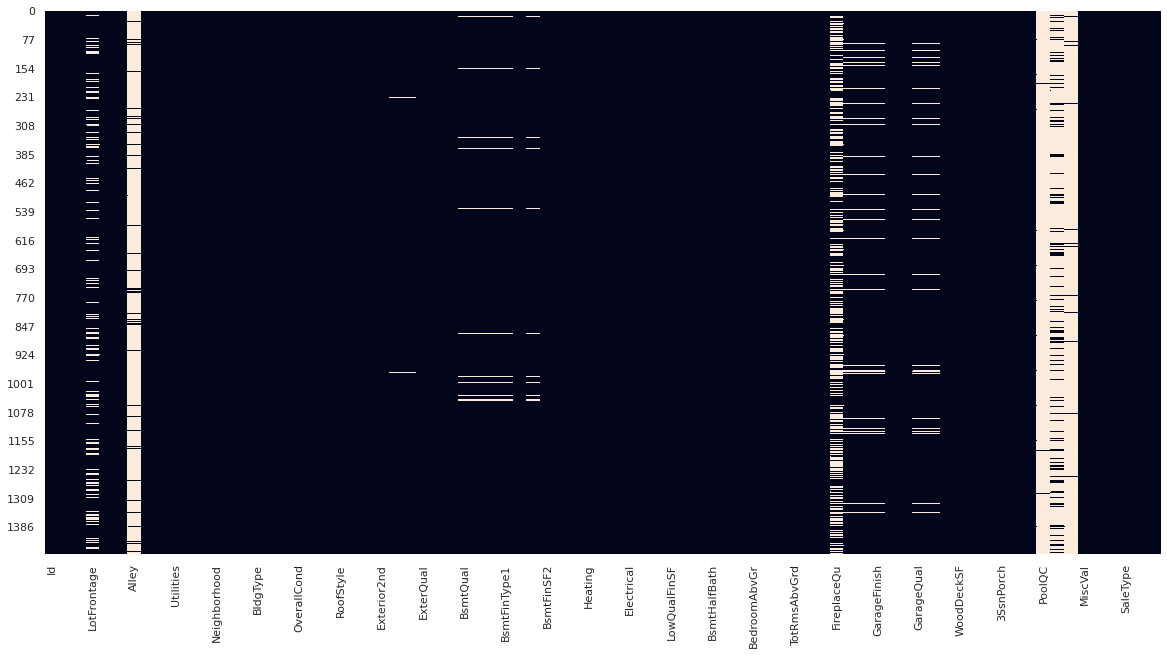

In [58]:
sns.heatmap(train.isnull(), cbar=False)
plt.gcf().set_size_inches(20, 10)

In [59]:
#Drop PoolQC, MiscFeature, Alley and Fence features
train =train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
test= test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

### cleaning object column

#### Seperating object and numerical datatype for cleaning

In [60]:
object_columns = train.select_dtypes(include=['object'])
numerical_columns=train.select_dtypes(exclude=['object'])

object_columns_t = test.select_dtypes(include=['object'])
numerical_columns_t=test.select_dtypes(exclude=['object'])

In [61]:
object_columns.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [62]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns[columns_None]= object_columns[columns_None].fillna('None')

object_columns_t[columns_None]= object_columns_t[columns_None].fillna('None')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [63]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)

object_columns[columns_with_lowNA] = object_columns[columns_with_lowNA].fillna(object_columns.mode().iloc[0])

object_columns_t[columns_with_lowNA] = object_columns_t[columns_with_lowNA].fillna(object_columns.mode().iloc[0])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
numerical_columns.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [65]:
print((numerical_columns['YrSold']-numerical_columns['YearBuilt']).median())
print(numerical_columns["LotFrontage"].median())

35.0
69.0


In [66]:
numerical_columns['GarageYrBlt'] = numerical_columns['GarageYrBlt'].fillna(numerical_columns['YrSold']-35)
numerical_columns['LotFrontage'] = numerical_columns['LotFrontage'].fillna(68)

numerical_columns_t['GarageYrBlt'] = numerical_columns_t['GarageYrBlt'].fillna(numerical_columns_t['YrSold']-35)
numerical_columns_t['LotFrontage'] = numerical_columns_t['LotFrontage'].fillna(68)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [67]:

numerical_columns= numerical_columns.fillna(0)

numerical_columns_t= numerical_columns_t.fillna(0)

In [68]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns['ExterQual'] = object_columns['ExterQual'].map(bin_map)
object_columns['ExterCond'] = object_columns['ExterCond'].map(bin_map)
object_columns['BsmtCond'] = object_columns['BsmtCond'].map(bin_map)
object_columns['BsmtQual'] = object_columns['BsmtQual'].map(bin_map)
object_columns['HeatingQC'] = object_columns['HeatingQC'].map(bin_map)
object_columns['KitchenQual'] = object_columns['KitchenQual'].map(bin_map)
object_columns['FireplaceQu'] = object_columns['FireplaceQu'].map(bin_map)
object_columns['GarageQual'] = object_columns['GarageQual'].map(bin_map)
object_columns['GarageCond'] = object_columns['GarageCond'].map(bin_map)
object_columns['CentralAir'] = object_columns['CentralAir'].map(bin_map)
object_columns['LotShape'] = object_columns['LotShape'].map(bin_map)
object_columns['BsmtExposure'] = object_columns['BsmtExposure'].map(bin_map)
object_columns['BsmtFinType1'] = object_columns['BsmtFinType1'].map(bin_map)
object_columns['BsmtFinType2'] = object_columns['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns['PavedDrive'] = object_columns['PavedDrive'].map(PavedDrive)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [69]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_t['ExterQual'] = object_columns_t['ExterQual'].map(bin_map)
object_columns_t['ExterCond'] = object_columns_t['ExterCond'].map(bin_map)
object_columns_t['BsmtCond'] = object_columns_t['BsmtCond'].map(bin_map)
object_columns_t['BsmtQual'] = object_columns_t['BsmtQual'].map(bin_map)
object_columns_t['HeatingQC'] = object_columns_t['HeatingQC'].map(bin_map)
object_columns_t['KitchenQual'] = object_columns_t['KitchenQual'].map(bin_map)
object_columns_t['FireplaceQu'] = object_columns_t['FireplaceQu'].map(bin_map)
object_columns_t['GarageQual'] = object_columns_t['GarageQual'].map(bin_map)
object_columns_t['GarageCond'] = object_columns_t['GarageCond'].map(bin_map)
object_columns_t['CentralAir'] = object_columns_t['CentralAir'].map(bin_map)
object_columns_t['LotShape'] = object_columns_t['LotShape'].map(bin_map)
object_columns_t['BsmtExposure'] = object_columns_t['BsmtExposure'].map(bin_map)
object_columns_t['BsmtFinType1'] = object_columns_t['BsmtFinType1'].map(bin_map)
object_columns_t['BsmtFinType2'] = object_columns_t['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_t['PavedDrive'] = object_columns_t['PavedDrive'].map(PavedDrive)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [70]:
#Select categorical features
rest_object_columns = object_columns.select_dtypes(include=['object'])
#Using One hot encoder
object_columns = pd.get_dummies(object_columns, columns=rest_object_columns.columns)


#Select categorical features
rest_object_columns = object_columns_t.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_t = pd.get_dummies(object_columns_t, columns=rest_object_columns.columns)

In [71]:
object_columns.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,4,0,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,2,2,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,4,2,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,4,4,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,4,2,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [72]:
object_columns_t.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,2,2,2,2,2,3,2,2,1,2,0,2,2,2,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,2,2,2,2,2,5,1,2,1,4,0,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,2,2,4,2,2,6,1,4,1,2,2,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,2,2,6,1,4,1,4,4,2,2,2,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,2,4,2,4,2,2,5,1,4,1,4,0,2,2,2,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


#### Concating numerical and object datatype

In [73]:
df_train= pd.concat([object_columns, numerical_columns], axis=1,sort=False)

df_test = pd.concat([object_columns_t, numerical_columns_t],axis=1,sort=False)



In [74]:
np.shape(df_train)
df_train['Id']= np.arange(0,1460,1,dtype=int)

In [75]:
df_test['Id']= np.arange(0,1459,1,dtype=int)

### 3. Feature Selection

##### --> Top k (input) features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X =df_train.iloc[:,:227]
y=df_train.iloc[:,-1]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1,ignore_index=True)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [ ]:
df = (featureScores.sort_values(by=['Score'],ascending=False)).iloc[:5,0] # best 100 features
df = pd.DataFrame(data=df, index=None, columns=['Specs'])
for ind in df.index: 
    print('\''+df['Specs'][ind]+'\'' +',')

'LotArea',
'MiscVal',
'2ndFlrSF',
'BsmtFinSF1',
'PoolArea',


#### ---> Feature Selection using wrapper methods
      1. Forward selection
      2. Backward elemination
      3. Stepwise selection.

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
import statsmodels.api as sm

forward_selection(X,y)

c:\users\astha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'RoofMatl_ClyTile',
 'SaleType_New',
 'TotalBsmtSF',
 'Condition2_PosN',
 'GarageArea',
 'Neighborhood_NridgHt',
 'KitchenAbvGr',
 'Neighborhood_NoRidge',
 'LotArea',
 'YearRemodAdd',
 'Neighborhood_StoneBr',
 'MSSubClass',
 'RoofMatl_WdShngl',
 'BsmtExposure',
 'Neighborhood_Crawfor',
 'YearBuilt',
 'OverallCond',
 'BedroomAbvGr',
 'Foundation_Slab',
 'Functional_Typ',
 'GarageFinish_RFn',
 'Neighborhood_Somerst',
 'BldgType_2fmCon',
 'Exterior1st_BrkFace',
 'MasVnrArea',
 'PoolArea',
 'Exterior1st_CemntBd',
 'Neighborhood_BrkSide',
 'Condition1_Norm',
 'MasVnrType_None',
 'TotRmsAbvGrd',
 'SaleCondition_Normal',
 'LotConfig_CulDSac',
 'LowQualFinSF',
 'Neighborhood_NWAmes',
 'LotFrontage',
 'Foundation_Wood',
 'Functional_Sev',
 'Heating_OthW',
 'GarageType_None',
 'GarageFinish_None',
 'ScreenPorch',
 'Street_Pave',
 'Street_Grvl',
 'Neighborhood_Mitchel',
 'Exterior2nd_ImStucc',
 'GarageCars',
 'WoodDeckSF',
 'BsmtQual',
 'Foundation_PC

In [ ]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=50,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_     # to get the final set of features

('BsmtQual',
 'BsmtExposure',
 'Street_Pave',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'RoofMatl_ClyTile',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior2nd_ImStucc',
 'MasVnrType_None',
 'Foundation_Slab',
 'Foundation_Wood',
 'Heating_OthW',
 'Functional_Sev',
 'Functional_Typ',
 'GarageType_None',
 'GarageFinish_RFn',
 'SaleType_New',
 'SaleCondition_Normal',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea')

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features
backward_elimination(X,y)

['BsmtQual',
 'BsmtExposure',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition2_PosN',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofMatl_ClyTile',
 'R

In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(), 
          k_features=45, 
          forward=False, 
          floating=False,
          cv=0)
sbs.fit(X, y)
sbs.k_feature_names_
# OUTPUT

('BsmtExposure',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_Timber',
 'Condition2_PosN',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkFace',
 'Foundation_Slab',
 'Functional_Typ',
 'GarageFinish_RFn',
 'SaleType_COD',
 'SaleType_WD',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'PoolArea')

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

c:\users\astha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


['OverallQual',
 'GrLivArea',
 'BsmtFinSF1',
 'RoofMatl_ClyTile',
 'SaleType_New',
 'TotalBsmtSF',
 'Condition2_PosN',
 'GarageArea',
 'Neighborhood_NridgHt',
 'Neighborhood_NoRidge',
 'LotArea',
 'Neighborhood_StoneBr',
 'MSSubClass',
 'RoofMatl_WdShngl',
 'BsmtExposure',
 'Neighborhood_Crawfor',
 'YearBuilt',
 'OverallCond',
 'BedroomAbvGr',
 'Foundation_Slab',
 'Neighborhood_Somerst',
 'GarageFinish_Fin',
 'Functional_Typ',
 'PoolArea',
 'SaleCondition_Normal',
 'Condition1_Norm',
 'Neighborhood_BrkSide',
 'MasVnrArea',
 'MasVnrType_BrkFace',
 'Exterior1st_BrkFace',
 'BldgType_2fmCon',
 'Exterior1st_CemntBd',
 'LotConfig_CulDSac',
 'Foundation_PConc',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'LowQualFinSF',
 'GarageType_None',
 'GarageFinish_None',
 'Neighborhood_NWAmes',
 'Heating_OthW',
 'ScreenPorch',
 'LotFrontage',
 'GarageFinish_Unf',
 'GarageFinish_RFn',
 'Foundation_Wood',
 'Street_Pave',
 'Street_Grvl',
 'Neighborhood_Mitchel',
 'Exterior2nd_ImStucc',
 'WoodDeckSF',
 'BsmtQual',


In [ ]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(), 
          k_features=(3,40), 
          forward=True, 
          floating=True,
          cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

('BsmtExposure',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'RoofMatl_ClyTile',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'MasVnrType_None',
 'Foundation_Slab',
 'Foundation_Wood',
 'Functional_Typ',
 'GarageFinish_RFn',
 'SaleType_New',
 'SaleCondition_Normal',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'PoolArea')

#### ----> Final Features

In [76]:
#Select feature column names and target variable we are going to use for training
features= ['BsmtExposure',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosN',
 'BldgType_2fmCon',
 
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'MasVnrType_None',
 'Foundation_Slab',
 'Foundation_Wood',
 'Functional_Typ',
 'GarageFinish_RFn',
 'SaleType_New',
 'SaleCondition_Normal',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'PoolArea'
]


target = 'SalePrice'
#Heating_Floor', 'Condition2_RRAn', 'Exterior2nd_Other', 'RoofMatl_Membran', 'HouseStyle_2.5Fin', 'Condition2_RRNn',
#'Electrical_Mix', 'Exterior1st_ImStucc']


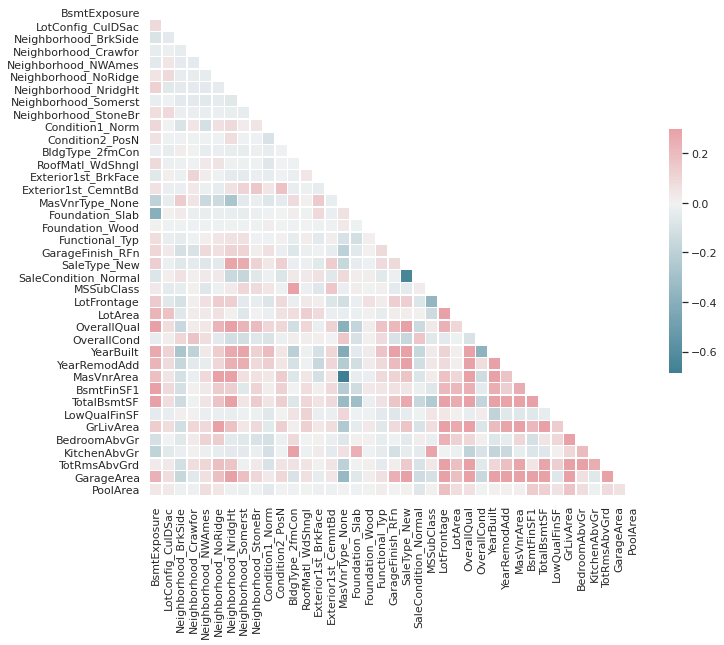

In [77]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate dataset
d = df_train[features]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 4. Model Training 

###  4.1 DecisionTree Regressor

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(df_train[features],df_train[target])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred = regressor.predict(df_test[features]) 
  
# print the predicted price 
print(y_pred) 

[111250. 157900. 185000. ... 218000. 118000. 206900.]


#### Visvualization

In [ ]:
from sklearn import tree
text_representation = tree.export_text(regressor)
print(text_representation)

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=features,  
                   filled=True)

#### File Submission

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':y_pred})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,111250.0
1,1462,157900.0
2,1463,185000.0
3,1464,185000.0
4,1465,189000.0


In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House_Price Predictions 7.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House_Price Predictions 7.csv


### 4.2  Multiple Regression

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (df_train[features], df_train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred2= regr.predict(df_test[features])

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':y_pred2})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,123297.990483
1,1462,159250.480660
2,1463,174155.511992
3,1464,186128.950358
4,1465,217265.710140


In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House_Price Predictions 10.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House_Price Predictions 10.csv


### 4.3 SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train[features], train[target])


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_pred3= regr.predict(features_df)

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':y_pred3})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,162912.723671
1,1462,163018.106645
2,1463,163049.214546
3,1464,163092.330448
4,1465,163044.963831


In [ ]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House_Price Predictions 3.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House_Price Predictions 3.csv


### 4.4 XGB Regressor - Extreme Gradient Boosting

In [79]:
import xgboost as xgb
from xgboost import XGBRegressor
xgbr = xgb.XGBRegressor(verbosity=0) 
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbr.fit(df_train[features], df_train[target])


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [80]:
ypred = xgbr.predict(df_test[features])

In [81]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':ypred})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,138517.968750
1,1462,155990.765625
2,1463,174222.343750
3,1464,183270.531250
4,1465,198574.421875


In [82]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House_Price Predictions 11.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House_Price Predictions 11.csv


#### 4.5 Gradient Boosting Machine

In [86]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
# define the model
model = GradientBoostingRegressor()
# fit the model on the whole dataset
model.fit(df_train[features], df_train[target])


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
ypred = model.predict(df_test[features])

In [88]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':ypred})

#Visualize the first 5 rows
submission.head()

,Id,SalePrice
0,1461,137143.823315
1,1462,154674.505189
2,1463,178638.152623
3,1464,183476.436167
4,1465,199962.365200


In [89]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'House_Price Predictions 12.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: House_Price Predictions 12.csv
